In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
file_name = "../data/Car details v3.csv"
df = pd.read_csv(file_name)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [7]:
#determine how many different value of mileage
mileage_cnt = df['mileage'].str.split(' ').str.get(1)
print(mileage_cnt.value_counts())
#km/kg for CFG and kmpl for everything else

engine_cnt = df['engine'].str.split(' ').str.get(1)
print(engine_cnt.value_counts())

max_power_cnt = df['max_power'].str.split(' ').str.get(1)
print(max_power_cnt.value_counts())

mileage
kmpl     7819
km/kg      88
Name: count, dtype: int64
engine
CC    7907
Name: count, dtype: int64
max_power
bhp    7907
Name: count, dtype: int64


In [8]:
from src.preprocessing import data_convert
df = data_convert(df)

In [9]:
#visualize after dropping column
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,2.524192,0.202322,0.085604,2.503647,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,0.552664,0.599787,0.279799,0.732668,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,2.000000,0.000000,0.000000,2.000000,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,3.000000,0.000000,0.000000,3.000000,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,3.000000,0.000000,0.000000,3.000000,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


In [10]:
new_X = df.drop(['selling_price'], axis=1).copy() #drop column (1, 0 for row)
y = df['selling_price'].copy()

In [11]:
print(y.value_counts()) #good diversity

selling_price
300000    208
350000    196
600000    167
400000    164
250000    161
         ... 
426000      1
358000      1
348000      1
978999      1
746000      1
Name: count, Length: 670, dtype: int64


In [12]:
print(new_X.head())

      name  year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0   Maruti  2014     145500     3            0             0      3    23.40   
1    Skoda  2014     120000     3            0             0      2    21.14   
2    Honda  2006     140000     2            0             0      1    17.70   
3  Hyundai  2010     127000     3            0             0      3    23.00   
4   Maruti  2007     120000     2            0             0      3    16.10   

   engine  max_power  seats  
0  1248.0      74.00    5.0  
1  1498.0     103.52    5.0  
2  1497.0      78.00    5.0  
3  1396.0      90.00    5.0  
4  1298.0      88.20    5.0  


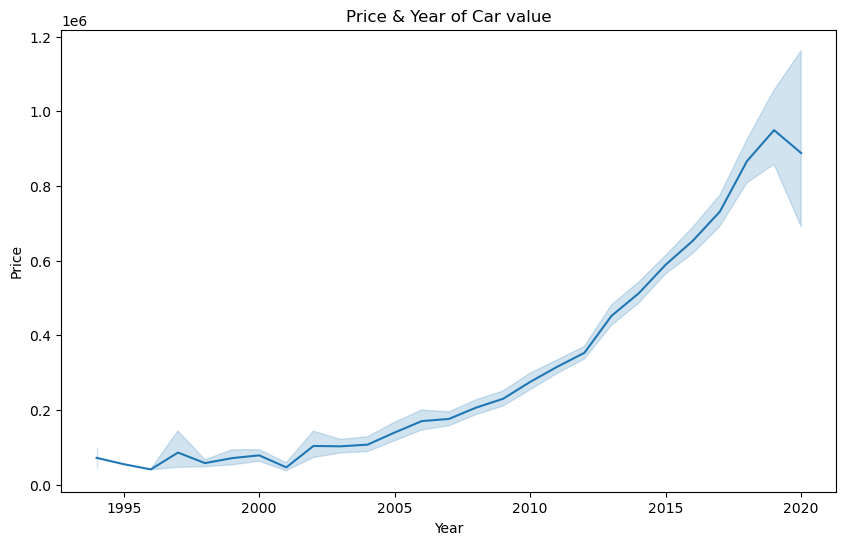

In [13]:
plot_x = df['year']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.lineplot(x=plot_x, y=plot_y)
plt.title('Price & Year of Car value')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
#year also does

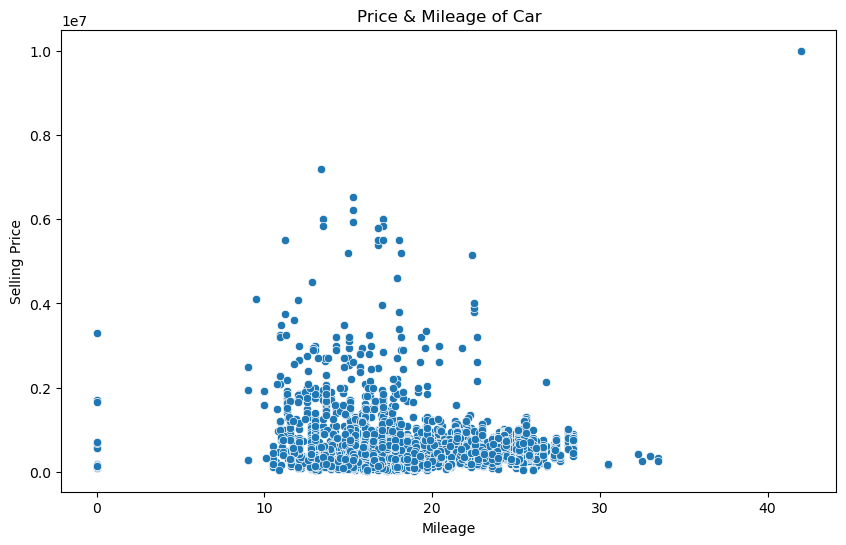

In [14]:
plot_x = df['mileage']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.scatterplot(x=plot_x, y=plot_y)
plt.title('Price & Mileage of Car')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.show()

#somewhat affect selling price

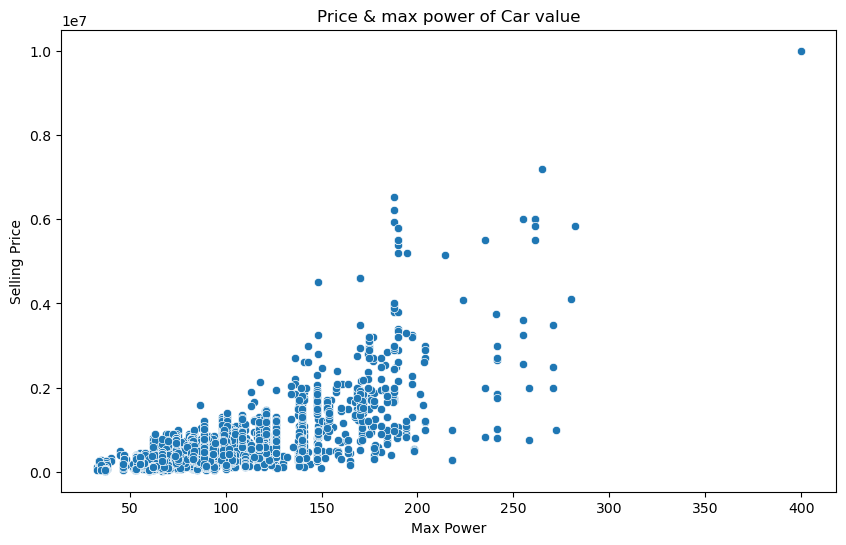

In [15]:
plot_x = df['max_power']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.scatterplot(x=plot_x, y=plot_y)
plt.title('Price & max power of Car value')
plt.xlabel('Max Power')
plt.ylabel('Selling Price')
plt.show()

#somewhat affect selling price

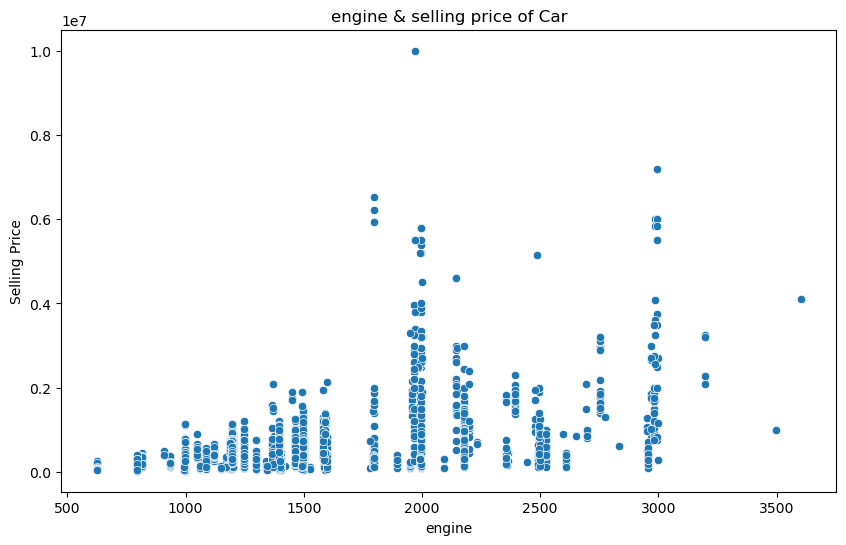

In [16]:
plot_x = df['engine']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.scatterplot(x=plot_x, y=plot_y)
plt.title('engine & selling price of Car')
plt.xlabel('engine')
plt.ylabel('Selling Price')
plt.show()
#somewhat affect selling price

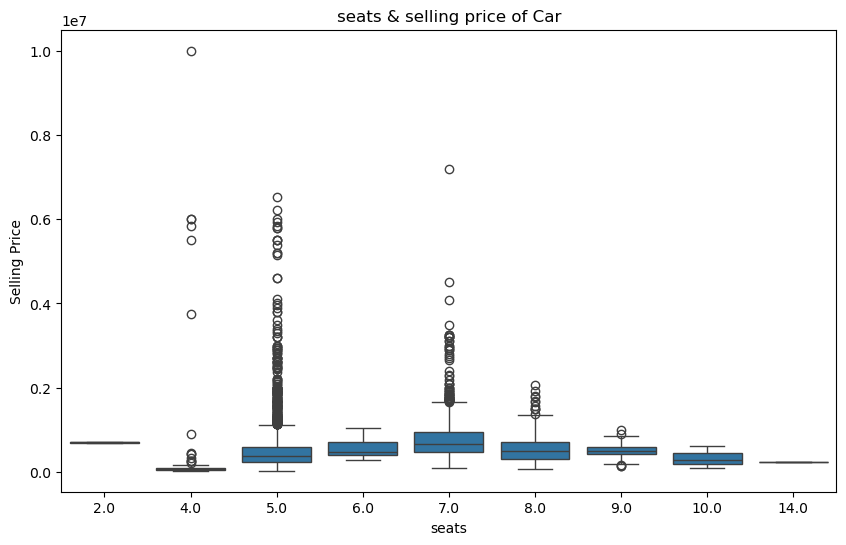

In [17]:
plot_x = df['seats']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.boxplot(x=plot_x, y=plot_y)
plt.title('seats & selling price of Car')
plt.xlabel('seats')
plt.ylabel('Selling Price')
plt.show()
#somewhat affect selling price

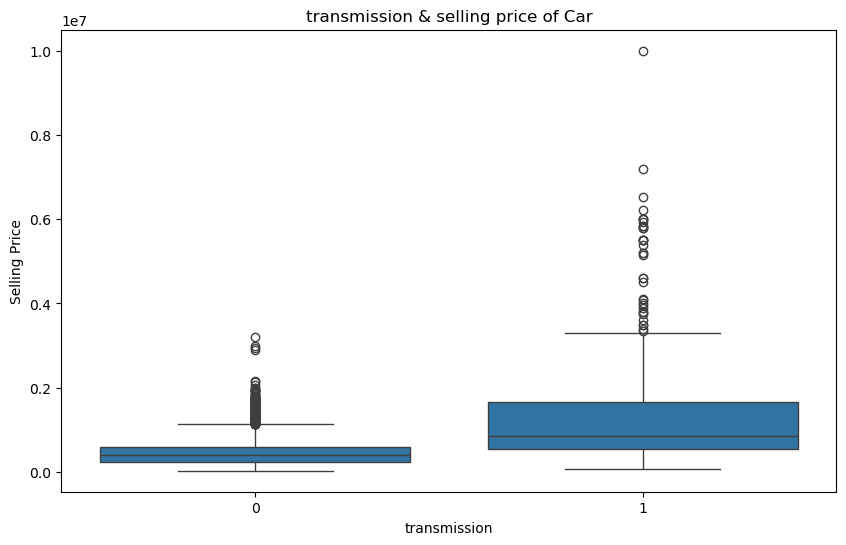

In [18]:
plot_x = df['transmission']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.boxplot(x=plot_x, y=plot_y)
plt.title('transmission & selling price of Car')
plt.xlabel('transmission')
plt.ylabel('Selling Price')
plt.show()
#somewhat affect selling price

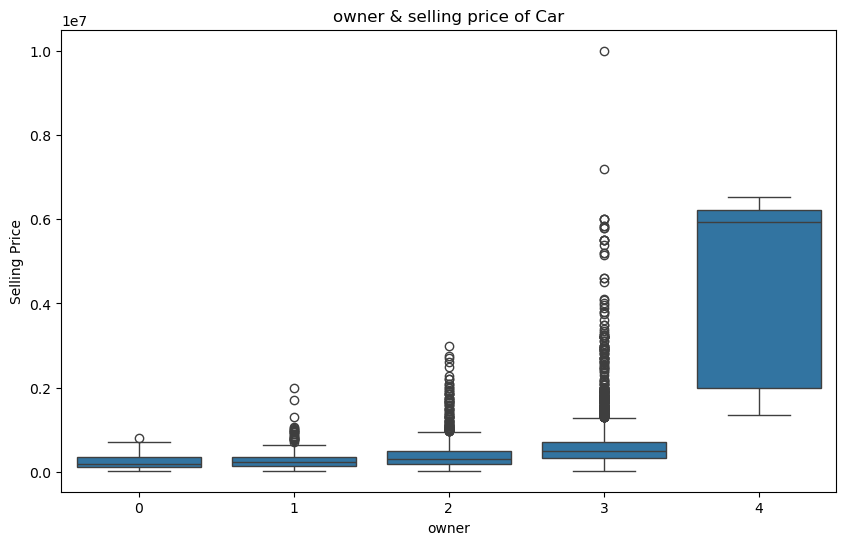

In [19]:
plot_x = df['owner']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.boxplot(x=plot_x, y=plot_y)
plt.title('owner & selling price of Car')
plt.xlabel('owner')
plt.ylabel('Selling Price')
plt.show()
#somewhat affect selling price
#likely because test drive car are premium and very low usage

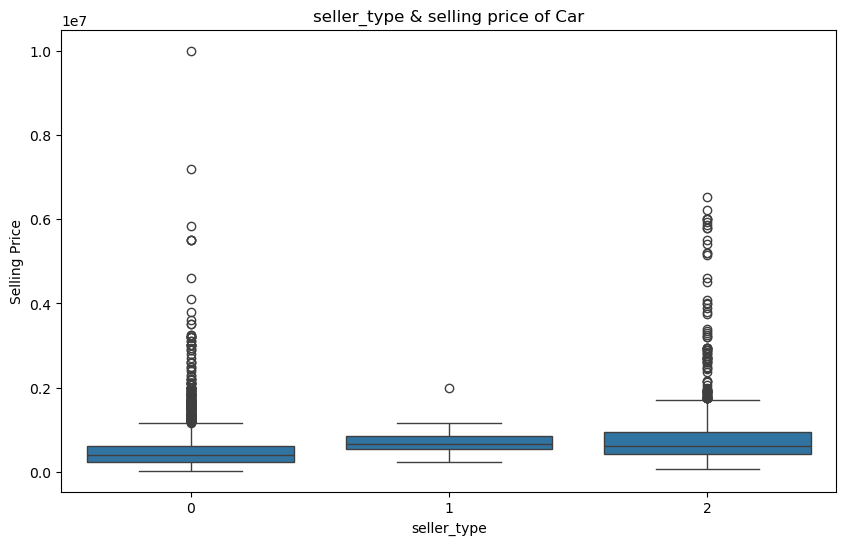

In [20]:
plot_x = df['seller_type']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.boxplot(x=plot_x, y=plot_y)
plt.title('seller_type & selling price of Car')
plt.xlabel('seller_type')
plt.ylabel('Selling Price')
plt.show()
#somewhat affect selling price

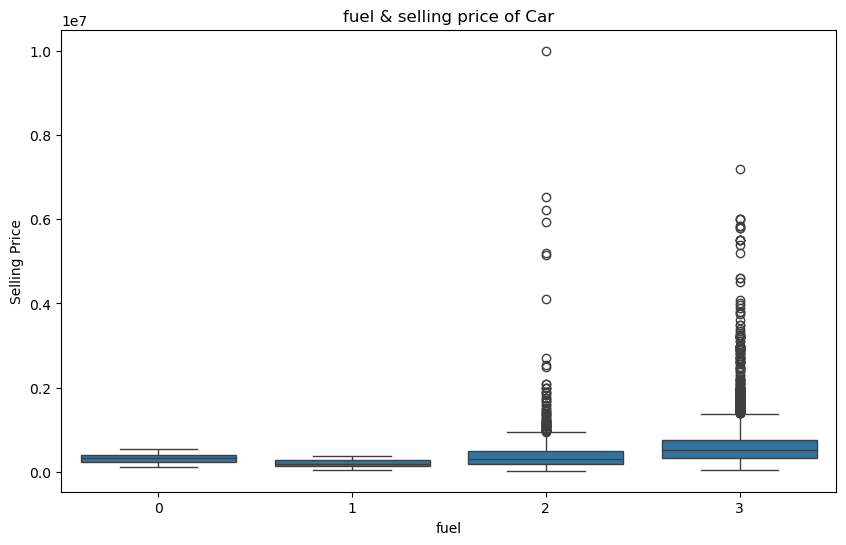

In [21]:
plot_x = df['fuel']
plot_y = df['selling_price']
plt.figure(figsize=(10,6))
sns.boxplot(x=plot_x, y=plot_y)
plt.title('fuel & selling price of Car')
plt.xlabel('fuel')
plt.ylabel('Selling Price')
plt.show()
#somewhat affect selling price

<Axes: >

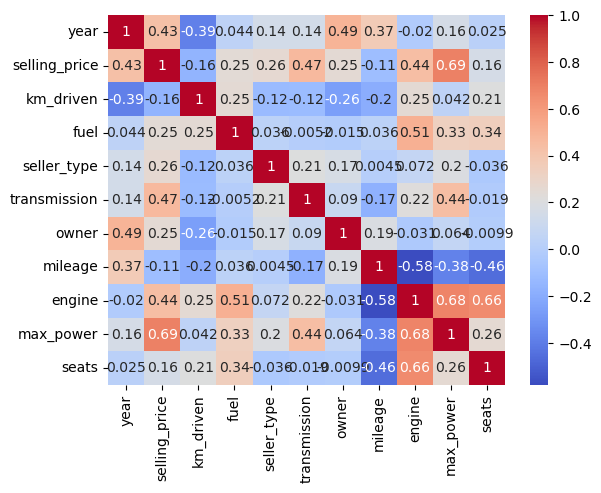

In [22]:
#create a heatmap with seaborns
#temporary dropping name column
X_heatmap = df.drop(['name'], axis = 1).corr()
sns.heatmap(X_heatmap, annot = True, cmap = 'coolwarm')

In [23]:
#identify brand name and selling price correlation
new_df = df.copy()
print(new_df['name'].describe())
res = new_df.groupby(['name']).mean()
res = res.sort_values(by='selling_price', ascending=False)
print(res)

count       6717
unique        31
top       Maruti
freq        2089
Name: name, dtype: object
                      year  selling_price      km_driven      fuel  \
name                                                                 
Lexus          2019.000000   5.150000e+06   20000.000000  2.000000   
Volvo          2016.888889   4.036111e+06   32388.888889  2.888889   
BMW            2014.288889   2.826222e+06   52924.200000  2.955556   
Jaguar         2015.500000   2.748250e+06   36562.500000  3.000000   
Land           2015.000000   2.716667e+06   54429.333333  3.000000   
Audi           2014.787879   2.422364e+06   57537.303030  2.848485   
Mercedes-Benz  2013.543478   2.253348e+06   54951.760870  2.760870   
Jeep           2017.590909   1.789227e+06   39619.227273  2.818182   
MG             2019.333333   1.783333e+06   12366.666667  2.000000   
Isuzu          2017.750000   1.752500e+06   54450.000000  3.000000   
Kia            2019.333333   1.372667e+06   11666.666667  3.000000

In [24]:
#identify brand name and selling price correlation

new_df = df.copy()
print(new_df['name'].describe())
res_2 = new_df.groupby(['name']).median()
res_2 = res_2.sort_values(by='selling_price', ascending=False)
print(res_2)

#so car brand can influence price

count       6717
unique        31
top       Maruti
freq        2089
Name: name, dtype: object
                 year  selling_price  km_driven  fuel  seller_type  \
name                                                                 
Lexus          2019.0      5150000.0    20000.0   2.0          2.0   
Volvo          2018.0      3400000.0    30000.0   3.0          0.0   
Jaguar         2015.5      2668000.0    40000.0   3.0          1.0   
BMW            2016.0      2500000.0    44000.0   3.0          2.0   
Audi           2015.0      2000000.0    46000.0   3.0          0.0   
Land           2013.0      2000000.0    64788.0   3.0          2.0   
Mercedes-Benz  2014.0      1892000.0    47500.0   3.0          0.0   
MG             2019.0      1750000.0    16500.0   2.0          2.0   
Jeep           2017.0      1650000.0    27500.0   3.0          0.0   
Isuzu          2018.0      1575000.0    43400.0   3.0          0.0   
Kia            2019.0      1575000.0    10000.0   3.0          0.0